# Pre-processing Notebook
- Input for this notebook: SCSE faculty staff DBLP info XML as input
- Task: Select correct network representation
- Output: process and create faculty network for analysis (assuming dataflow methodology, a network should be returned

In [12]:
import networkx as nx
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
import pickle

In [50]:
# Import faculty details into df
faculty_df = pd.read_excel('Faculty.xlsx')

# Select relevant columns
faculty_df = faculty_df[['Faculty', 'Position', 'Gender', 'Management', 'DBLP', 'Area']]

# Create dictionary
faculty_dict = faculty_df.to_dict('index')

# Declare empty List
faculty_list = []

'''
# each[1] corresponds to lumped meta data
# each[1]['Faculty'] corresonds to 'Faculty'
# each[1]['Position'] corresonds to 'Position'
# each[1]['Gender'] corresonds to 'Gender'
# each[1]['Management'] corresponds to 'Management'
# each[1]['DBLP'] corresponds to 'DBLP'
# each[1]['Area'] corresponds to 'Area'
'''
# Iterate over faculty_dict to fill up faculty_list
for each in faculty_dict.items():
    
    node_no = each[0] 
    faculty = each[1]['Faculty']
    position = each[1]['Position']
    gender = each[1]['Gender']
    management = each[1]['Management']
    dblp = each[1]['DBLP']
    area = each[1]['Area']
    
    faculty_list.append((node_no, {'Faculty': faculty}))
    faculty_list.append((node_no, {'Position': position}))
    faculty_list.append((node_no, {'Gender': gender}))
    faculty_list.append((node_no, {'Management': management}))
    faculty_list.append((node_no, {'DBLP': dblp}))
    faculty_list.append((node_no, {'Area': area}))
    
# Declare empty new graph for faculty network
faculty_graph = nx.MultiGraph()

# Fill up empty graph w/ faculty_list
faculty_graph.add_nodes_from(faculty_list)

In [51]:
file_name = "empty_faculty_graph.pkl"

open_file = open(file_name, "wb")
pickle.dump(faculty_graph, open_file)
open_file.close()

In [28]:
#list(faculty_graph.nodes)

In [29]:
# need to scrape correspondly DBL data, then augment them with existing dataset
# have to then decide how we'll be using augment faculty details to connect and generate the network

In [41]:
# Segment to use previously-extracted DBLP raw data to map collaborations between faculty staff

# Import dblp_df.csv as DF
dblp_df = pd.read_csv('dblp_df.csv')

# Create categorical class counts for each article

# Use categorical class counts to map all related faculty members with a dict

In [42]:
dblp_multi_df = dblp_df[dblp_df['key'].duplicated(keep=False)]
dblp_multi_df.sort_values(by=['key'])

,f_index,Faculty,key,mdate,Title,Year,Journal
2230,29,Lana Obraztsova,journals/aamas/BannikovaDORR21,2021-02-11,Reaching consensus under a deadline.,2021,Auton. Agents Multi Agent Syst.
4221,74,Zinovi Rabinovich,journals/aamas/BannikovaDORR21,2021-02-11,Reaching consensus under a deadline.,2021,Auton. Agents Multi Agent Syst.
4512,77,Ong Yew Soon,journals/access/HuLWOZ18,2020-08-30,How to Find a Perfect Data Scientist: A Distan...,2018,IEEE Access
4693,80,Wen Yonggang,journals/access/HuLWOZ18,2020-08-30,How to Find a Perfect Data Scientist: A Distan...,2018,IEEE Access
4675,80,Wen Yonggang,journals/access/WangHHXNWWK19,2020-06-30,A Survey on Consensus Mechanisms and Mining St...,2019,IEEE Access
...,...,...,...,...,...,...,...
3456,56,Seah Hock Soon,journals/vlsisp/CheongLSQZTSOK09,2020-03-27,Embedded Computing for Fluorescence Confocal E...,2009,J. Signal Process. Syst.
1868,22,Hui Siu Cheung,journals/www/ChongHYF98,2017-05-20,A WWW-Assisted Fax System for Internet Fax-to-...,1998,World Wide Web
3973,68,Yeo Chai Kiat,journals/www/ChongHYF98,2017-05-20,A WWW-Assisted Fax System for Internet Fax-to-...,1998,World Wide Web
3964,68,Yeo Chai Kiat,journals/www/PhuaHY00,2017-05-20,A web-based Internet Java Phone for real-time ...,2000,World Wide Web


In [43]:
# get categorical uniques in dataframe
categorical_list = dblp_multi_df['key'].drop_duplicates().tolist()

# create list to store key:f_index_list mappins
key_findex_list = []

# use categorical uniques to return df records
for each in categorical_list:
    # extract f_index values from returned df records into a list
    mappings = dblp_multi_df[dblp_multi_df['key'] == each]['f_index'].tolist()
    # create unique pair-wise combinations for mappings (needed for networkx) 
    mappings_pair = list(combinations(mappings, 2)) 
    year = dblp_multi_df[dblp_multi_df['key'] == each]['Year'].iloc[0]
    key_findex_list.append([mappings_pair, each, year])

In [44]:
key_findex_list

[[[(0, 16)], 'journals/tvt/NguyenMN16', 2016],
 [[(1, 56)], 'journals/cg/SoonS04', 2004],
 [[(2, 19)], 'journals/cem/ShrivastwaPCSCG20', 2020],
 [[(2, 5)], 'journals/tc/BhattacharjeeTE20', 2020],
 [[(2, 59)], 'journals/mam/RaviNBKGC19', 2019],
 [[(2, 59)], 'journals/iacr/RaviGCKNB19', 2019],
 [[(2, 59)], 'journals/iacr/RaviGCB19', 2019],
 [[(2, 27)], 'journals/pieee/BurgCL18', 2018],
 [[(2, 27)], 'journals/tcas/PudiCL18', 2018],
 [[(2, 5)], 'journals/corr/abs-1809-08195', 2018],
 [[(2, 27)], 'journals/corr/abs-1810-00545', 2018],
 [[(2, 17)], 'journals/cogcom/CambriaCLMW17', 2017],
 [[(2, 59)], 'journals/ccds/GuptaCK13', 2013],
 [[(2, 59)], 'journals/tc/GuptaCSMS13', 2013],
 [[(2, 59)], 'journals/iacr/GuptaCK12', 2012],
 [[(3, 60)], 'journals/jasis/LiSD13', 2013],
 [[(3, 60)], 'journals/snam/LiDS12', 2012],
 [[(5, 64)], 'journals/rts/SamaddarET20', 2020],
 [[(5, 64)], 'journals/tosn/JiangTE20', 2020],
 [[(5, 64)], 'journals/corr/abs-2004-06368', 2020],
 [[(5, 83)], 'journals/corr/abs-2

In [49]:
# save key_findex_list into pickle file for easy replication

file_name = "key_findex_list.pkl"

open_file = open(file_name, "wb")
pickle.dump(key_findex_list, open_file)
open_file.close()


In [45]:
# iterate over key_findex_list to populate initial network

for each in key_findex_list:
    faculty_graph.add_edges_from(each[0], label=[each[1], each[2]])

In [48]:
# save faculty_graph into pickle file for easy replication

file_name = "faculty_graph.pkl"

open_file = open(file_name, "wb")
pickle.dump(faculty_graph, open_file)
open_file.close()


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  ...     arc.set_alpha(alphas[i])


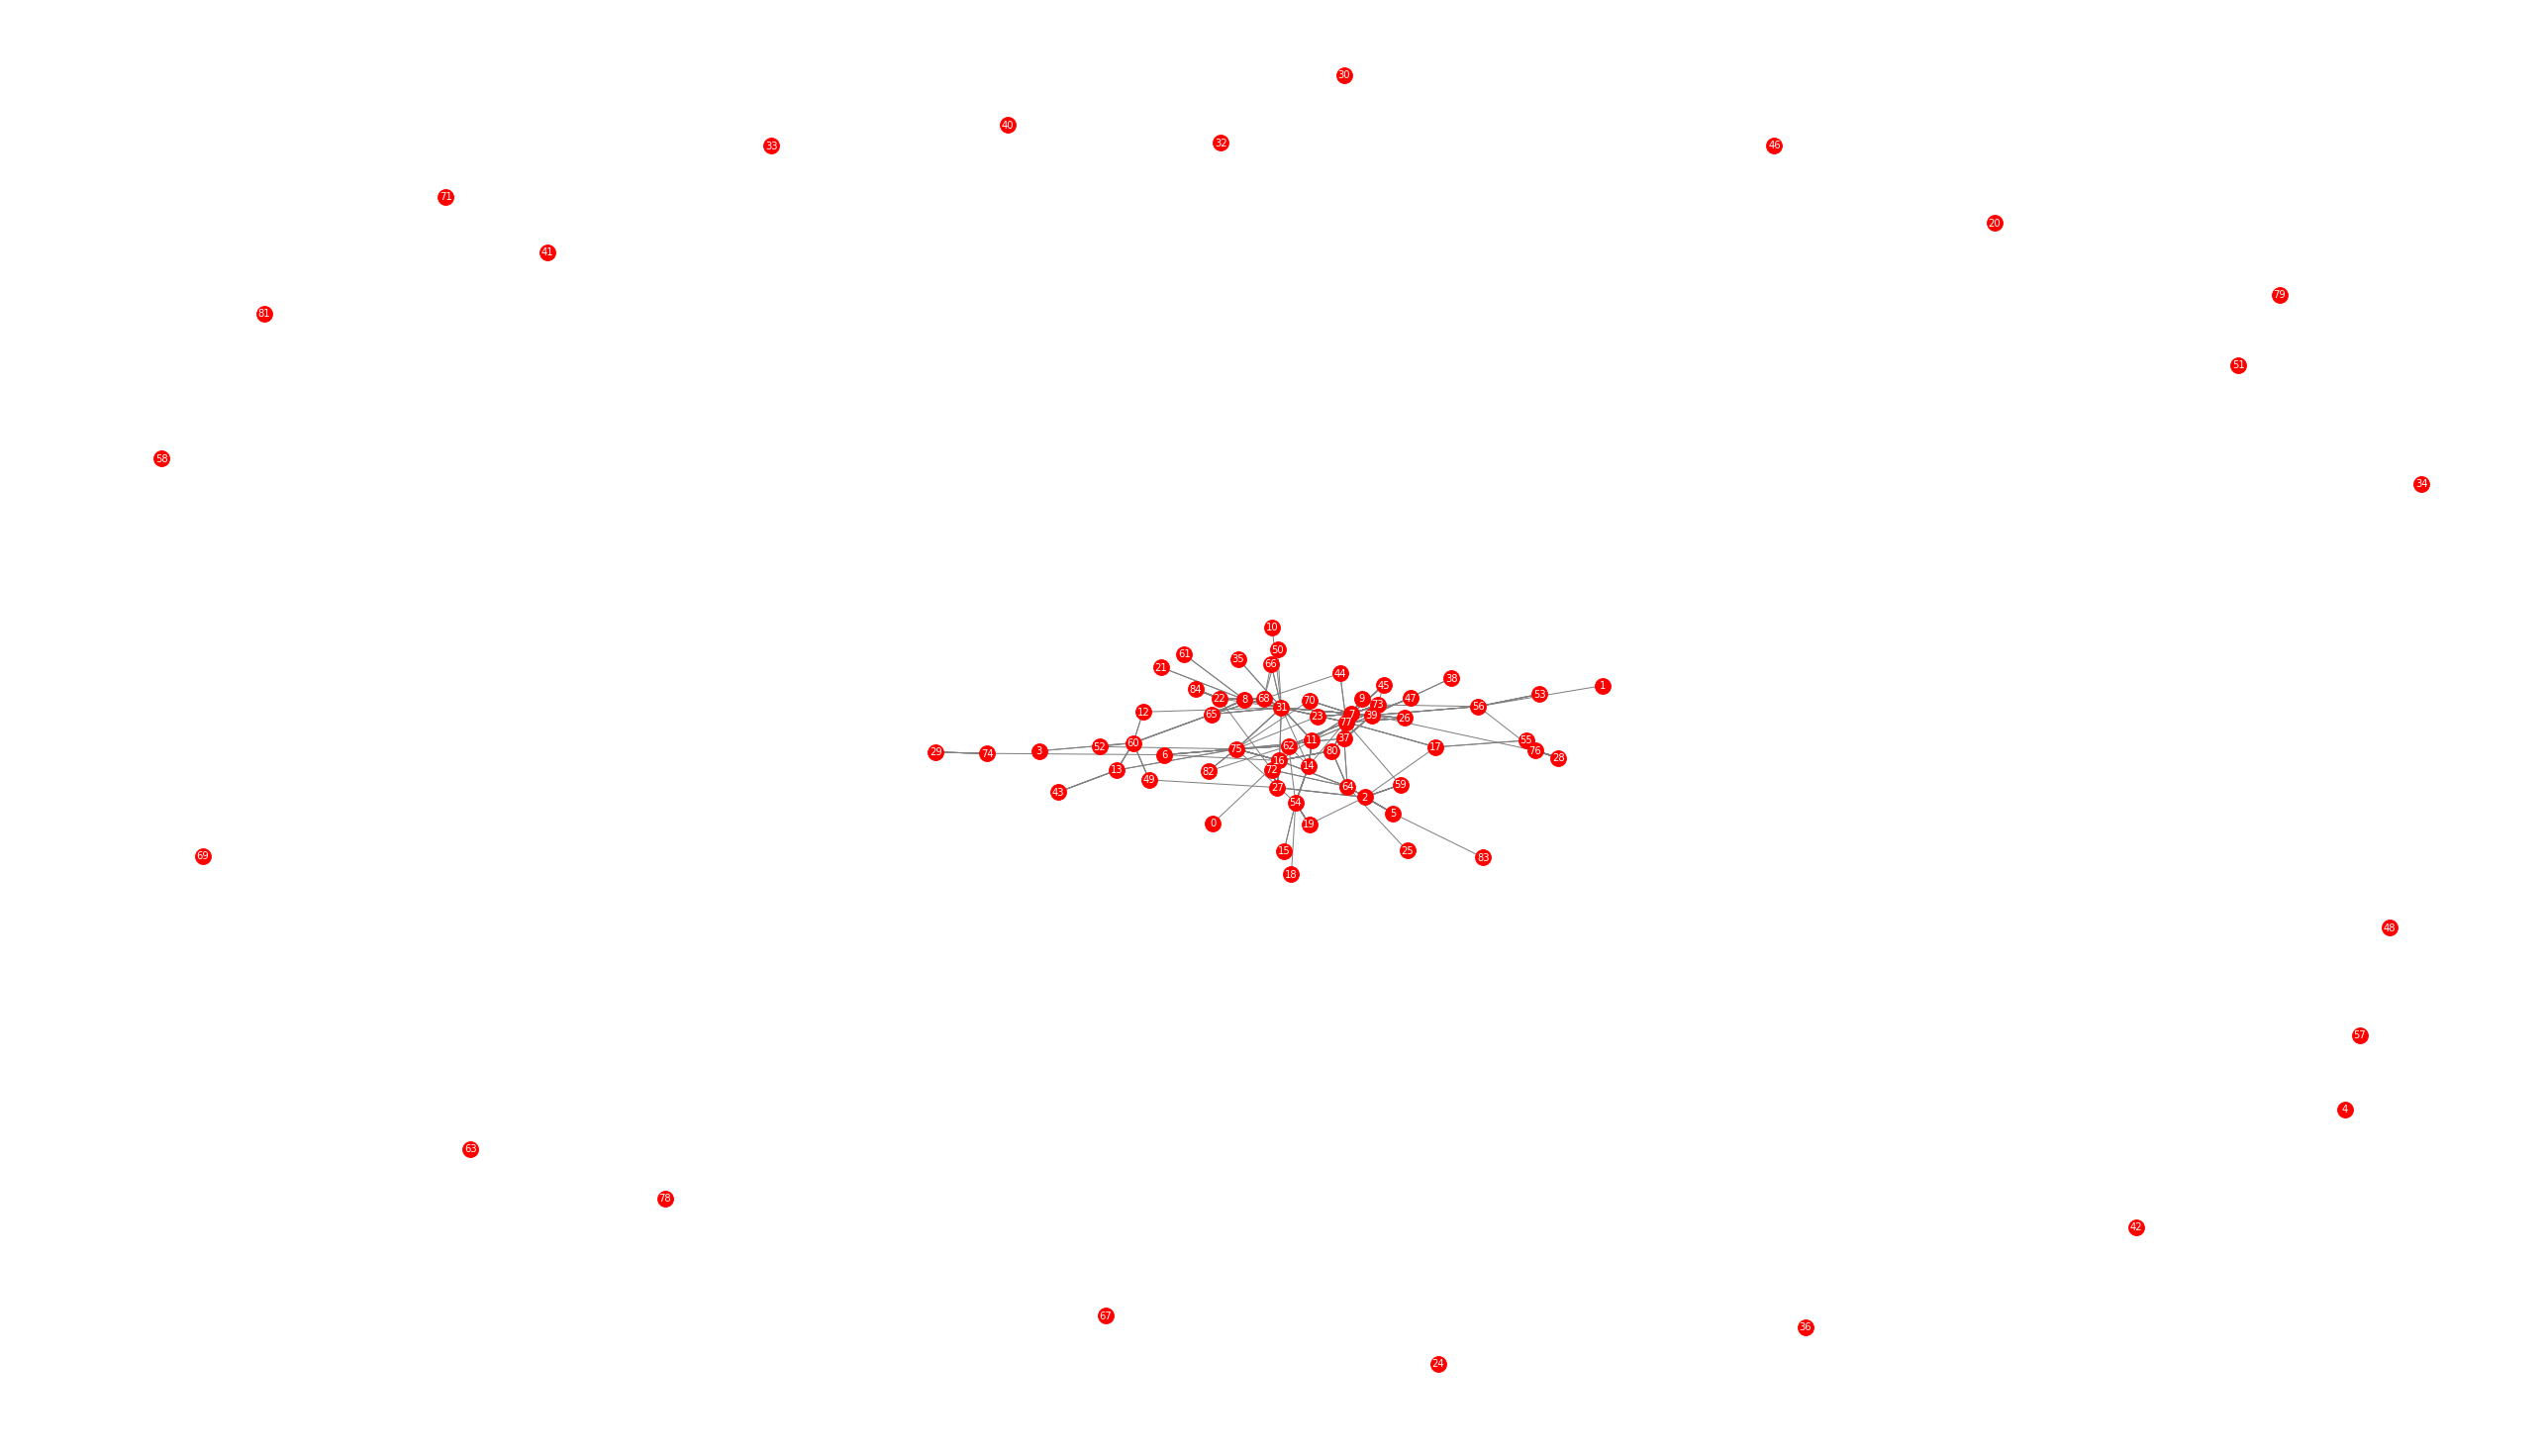

In [46]:
# Set figure for graph
plt.figure(figsize=(35, 20))

# Draw the graph
nx.draw(faculty_graph, with_labels=True, font_size=10,
        node_color='red', font_color='white', edge_color='grey', node_size=250)

# Save the graph
plt.savefig("collab_graph.png", dpi=326)

In [36]:
# Remove isolates
faculty_graph.remove_nodes_from(list(nx.isolates(faculty_graph)))

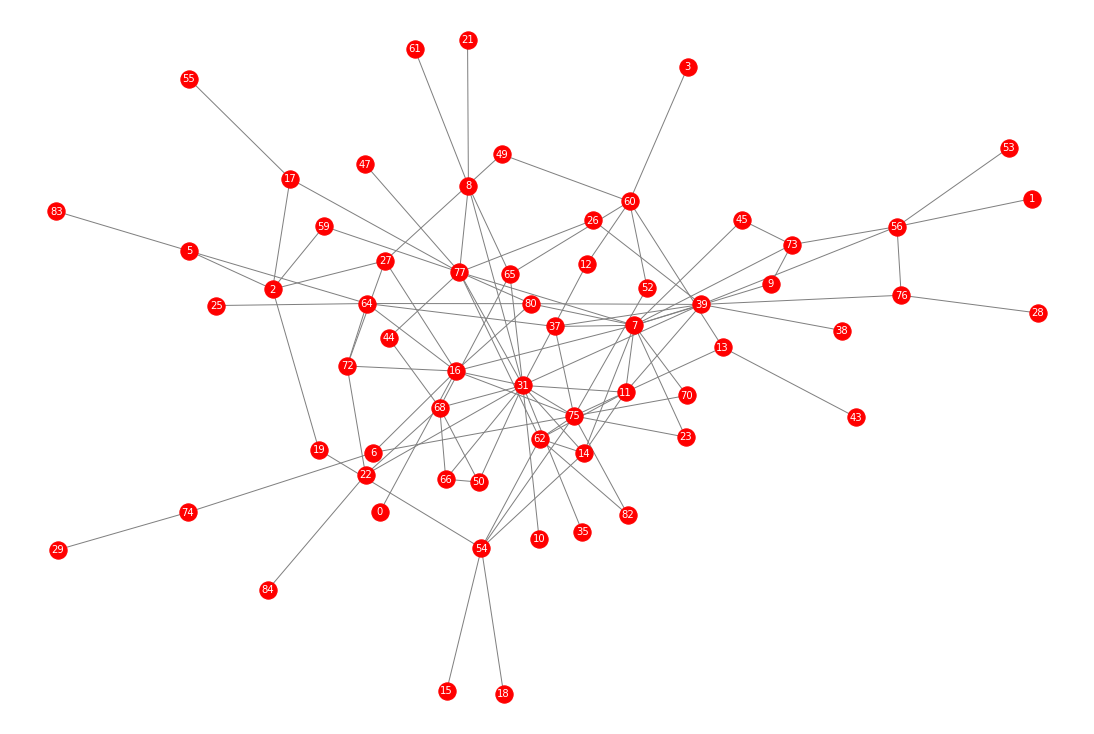

In [76]:
# Set figure for graph
plt.figure(figsize=(15, 10))

# Draw the graph (with isolates removed)
nx.draw(faculty_graph, with_labels=True, font_size=10,
        node_color='red', font_color='white', edge_color='grey', node_size=300)

# Save the graph
plt.savefig("collab_graph_connected_only.png", dpi=326)